In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\bp-age.csv")
df

,bp,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


# Given age of a person find bp

<h4>Regression Problem->Continuous data column
<br>Using Linear Regression

In [8]:
#make a scatter plot,y axis is bp(dependent data),x axis age(independent data)

<Axes: xlabel='age', ylabel='bp'>

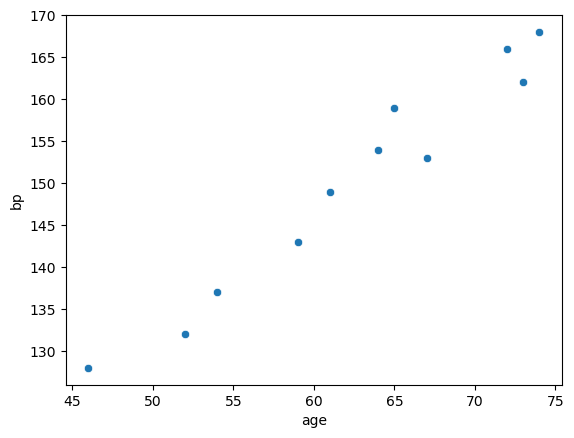

In [9]:
sns.scatterplot(x="age",y="bp",data=df)

In [10]:
#+ve linear when slope is always same

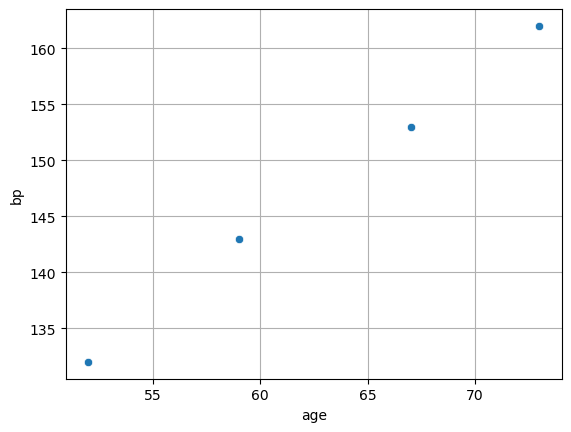

In [11]:
sns.scatterplot(x="age",y="bp",data=df[:4])#now finding best fit line for this data
plt.grid(True)

<h4> single independent variable->single linear regression(slr)
<h4> multiple independent variable->multiple linear regression(mlr)

<h3> Normalization/ Standardisation

In [12]:
x=df['age'].values
m=x.mean()# mean of all values
m

np.float64(62.45454545454545)

In [13]:
x-m # how far each age is from the centre mean

array([-10.45454545,  -3.45454545,   4.54545455,  10.54545455,
         1.54545455,  11.54545455,  -8.45454545,  -1.45454545,
         2.54545455, -16.45454545,   9.54545455])

In [14]:
s=x.std()
s

np.float64(8.690262433150382)

In [15]:
xnorm=(x-m)/s #reducing the large value to a smaller equivalent
xnorm

array([-1.20301838, -0.39751912,  0.52305147,  1.21347941,  0.1778375 ,
        1.32855074, -0.97287574, -0.16737647,  0.29290882, -1.89344632,
        1.09840809])

In [16]:
# now we can find the error where squaring won't be an issue

In [17]:
y=df['bp'].values
w0=1 #reference purpose
w1=0 #reference purpose

In [18]:
ypred=w0+w1*xnorm

In [19]:
y[:1]

array([132])

In [20]:
ypred[:1]

array([1.])

In [21]:
y-w1*xnorm-w0

array([131., 142., 152., 161., 153., 167., 136., 148., 158., 127., 165.])

In [22]:
np.sum(y-w1*xnorm-w0)

np.float64(1640.0)

In [23]:
n=df.shape[0]

In [24]:
dw0=-2/n*np.sum(y-w1*xnorm-w0)#gradient decent of w0->dj/dw0

In [25]:
#learning rate->small percentage of the gd 
#.001-> hyperparameter,to be changed accordingly to tune the algo
w0=w0-.001*dw0
w0

np.float64(1.2981818181818183)

In [26]:
def learn(X,y,w0=1,w1=1,alpha=.001,steps=2000):
    # we code this function
    n=X.shape[0]
    wdf=pd.DataFrame(columns=["w0","w1","error"])
    ypred=w0+w1*X
    error=np.sqrt(np.mean((y-ypred)**2))
    
    wdf.loc[0]=[w0,w1,error]
    for iter in range(steps):
        dw1=-2/n*np.sum(X*(y-w0-w1*X))
        dw0=-2/n*np.sum(y-w0-w1*X)
        w1=w1-alpha*dw1
        w0=w0-alpha*dw0
        ypred=w0+w1*X
        error=np.sqrt(np.mean((y-ypred)**2))
        wdf.loc[iter+1]=[w0,w1,error]
    t=(w0,w1,wdf)
    return t

In [27]:
y

array([132, 143, 153, 162, 154, 168, 137, 149, 159, 128, 166])

In [28]:
c,m,errdf=learn(xnorm,y)

In [29]:
m

np.float64(12.502131110611712)

In [30]:
c

np.float64(147.3711293302771)

In [31]:
errdf.shape

(2001, 3)

In [32]:
errdf[:10]

,w0,w1,error
0,1.000000,1.000000,149.574321
1,1.298182,1.023432,149.275267
2,1.595767,1.046817,148.976812
3,1.892758,1.070155,148.678954
4,2.189154,1.093446,148.381692
5,2.484957,1.116691,148.085025
6,2.780169,1.139889,147.788951
7,3.074791,1.163041,147.493469
8,3.368823,1.186147,147.198579
9,3.662267,1.209206,146.904279


In [33]:
errdf[-10:]

,w0,w1,error
1991,147.321680,12.498245,3.851349
1992,147.327219,12.498681,3.847344
1993,147.332746,12.499115,3.843351
1994,147.338262,12.499548,3.839370
1995,147.343768,12.499981,3.835400
1996,147.349262,12.500413,3.831442
1997,147.354745,12.500844,3.827496
1998,147.360217,12.501274,3.823562
1999,147.365679,12.501703,3.819640
2000,147.371129,12.502131,3.815729


In [34]:
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [35]:
df=df.drop("srno",axis=1)

KeyError: "['srno'] not found in axis"

In [31]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [32]:
df[:5]

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
df.shape

(200, 4)

<h3> Divide data into x and y
<h4><i> Identify x and y based on your data and problem statement

In [34]:
x=df.drop("sales",axis=1) #independent variables

In [35]:
y=df["sales"] #dependent variables

<h3> Divide data into training and test set
<h4><i> Decide what percentage will go to which set

In [36]:
#python module - Scikit learn in Numpy

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import linear_model #for linear regression
from sklearn import metrics

In [38]:
200*.85

170.0

In [39]:
#setting 85% data as training data

In [40]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=.15,random_state=42) #random_state=seed value,picks up 85% data randomly

In [41]:
xtrain[:5]

,TV,radio,newspaper
9,199.8,2.6,21.2
18,69.2,20.5,18.3
55,198.9,49.4,60.0
75,16.9,43.7,89.4
150,280.7,13.9,37.0


In [42]:
ytrain[:5]

9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
Name: sales, dtype: float64

In [43]:
xtrain.shape

(170, 3)

In [44]:
#create object of Algorithm class
model=linear_model.LinearRegression()
#LR is a python class
#object of this class represents algo

In [45]:
#n independent variables= n+1 weights(+1 for intercept)
#sales=w0+w1tv+w2radio+w3np

In [46]:
#carry out model learning/fitting
model.fit(xtrain,ytrain)

LinearRegression()

In [47]:
#viewing weights(optional)
model.coef_ #w1,w2,w3

array([0.04481159, 0.18846874, 0.00075285])

In [48]:
model.intercept_ #w0

3.028025569751609

In [49]:
predtest=model.predict(xtest)
predtrain=model.predict(xtrain)

In [50]:
list(zip(ytest,predtest))[:5]

[(16.9, 16.34119567196221),
 (22.4, 20.81399431133004),
 (21.4, 21.51952778369071),
 (7.3, 10.540846520795661),
 (24.7, 22.137395458755694)]

In [51]:
rmsetest=np.sqrt(np.mean((ytest-predtest)**2))
rmsetrain=np.sqrt(np.mean((ytrain-predtrain)**2))

In [52]:
rmsetrain

1.6676211385861943

In [53]:
rmsetest

1.6894061654327301

In [54]:
xtrain[:2]

,TV,radio,newspaper
9,199.8,2.6,21.2
18,69.2,20.5,18.3


In [56]:
ytrain[:2]

9     10.6
18    11.3
Name: sales, dtype: float64

In [59]:
metrics.r2_score(ytest,predtest)

0.9110275702091712

In [62]:
trainer=ytrain-predtrain

# Residual Plot(check if it's Normal Bell curve)

C:\Temp\ipykernel_13360\2632531017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainer,hist=False)


<Axes: xlabel='sales', ylabel='Density'>

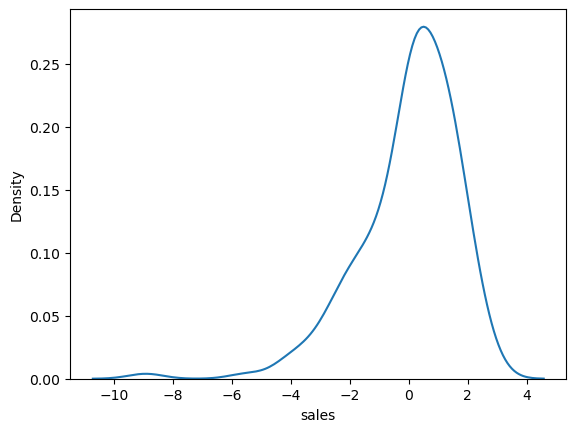

In [65]:
sns.distplot(trainer,hist=False)

Text(0.5, 0, 'PREDICTED VALUE')

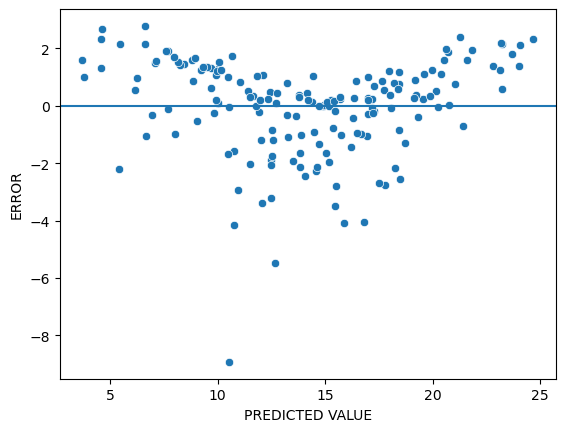

In [66]:
sns.scatterplot(x=predtrain,y=trainer)
plt.axhline(y=0)
plt.ylabel("ERROR")
plt.xlabel("PREDICTED VALUE")

In [67]:
#above scatter plot isnot homoscandous, so LR model will not work that well with the dataset

In [68]:
model.coef_

array([0.04481159, 0.18846874, 0.00075285])

<h4> other ways to determine if the column is actually influencing depending variables(besides observing weights)

<Axes: xlabel='TV', ylabel='sales'>

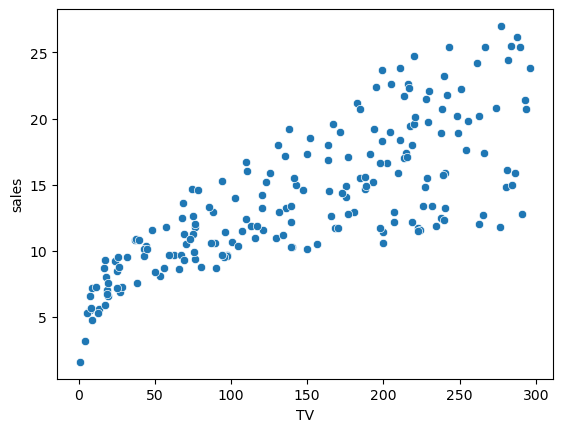

In [71]:
sns.scatterplot(y="sales",x="TV",data=df)
#should give a linear trend, if yes then this factor is important to predict y

<Axes: xlabel='radio', ylabel='sales'>

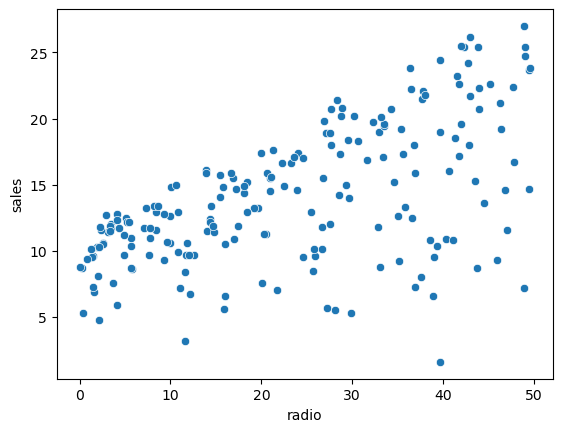

In [73]:
sns.scatterplot(y="sales",x="radio",data=df)

<Axes: xlabel='newspaper', ylabel='sales'>

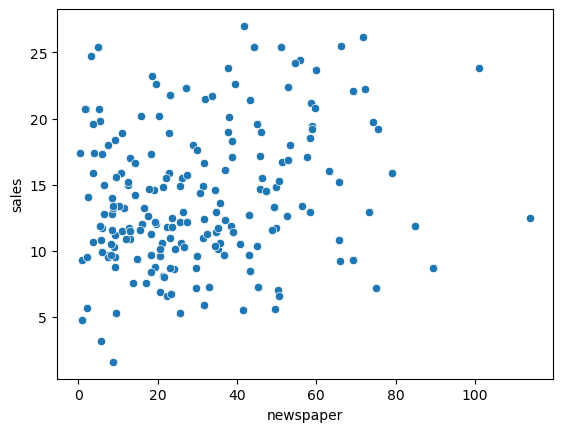

In [74]:
sns.scatterplot(y="sales",x="newspaper",data=df)

In [75]:
df.corr()#measuring correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<h3> from correalation,plot and model we decide to drop column "newspaper"

In [76]:
model.coef_

array([0.04481159, 0.18846874, 0.00075285])

In [77]:
weightser=pd.Series(np.abs(model.coef_),index=xtrain.columns)

In [78]:
weightser

TV           0.044812
radio        0.188469
newspaper    0.000753
dtype: float64

In [79]:
weightser.sort_values(ascending=False)

radio        0.188469
TV           0.044812
newspaper    0.000753
dtype: float64

In [80]:
xtrain.drop("newspaper",axis=1,inplace=True)
xtest.drop("newspaper",axis=1,inplace=True)

In [81]:
model=linear_model.LinearRegression()
model.fit(xtrain,ytrain)
predtrain=model.predict(xtrain)
predtest=model.predict(xtest)
print("TRAINING METRICS")
print("==================")
print("RMSE",np.sqrt(metrics.mean_squared_error(ytrain,predtrain)))
print("R.SQUARED",metrics.r2_score(ytest,predtest))
print("TEST METRICS")
print("==================")
print("RMSE",np.sqrt(metrics.mean_squared_error(ytest,predtest)))
print("R.SQUARED",metrics.r2_score(ytrain,predtrain))

TRAINING METRICS
RMSE 1.6676830455520653
R.SQUARED 0.9112265003386999
TEST METRICS
RMSE 1.6875164685226176
R.SQUARED 0.8936714644474881
